Easy to use xarray simulation tool:
https://github.com/jbusecke/xmovie

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime,timedelta
from xmovie import Movie

%matplotlib inline

# Load Data

In [3]:
input_path = '/home/hgrosselindemann/Documents/TORI/'

velocity = xr.open_dataset(input_path + 'velocity_raw_filtered.nc')

In [4]:
velocity_daily = velocity.resample(time='5D').mean(dim='time')

In [5]:
velocity_daily

<xarray.Dataset>
Dimensions:     (time: 366, y: 60, x: 49)
Coordinates:
    lat         (y, x) float64 21.02 21.03 21.03 21.03 ... 26.35 26.35 26.35
    lon         (y, x) float64 118.7 118.8 118.9 119.0 ... 123.2 123.3 123.4
  * time        (time) datetime64[ns] 2013-01-01 2013-01-06 ... 2017-12-31
Dimensions without coordinates: y, x
Data variables:
    u           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    v           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    u_filtered  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    v_filtered  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan

# Movie

In [6]:
fig = plt.figure(figsize=(10,10))

def custom_plotfunc(ds,fig,tt,framedim='time',**kwargs):
    ax = fig.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
    ds.isel({framedim:tt}).plot.quiver('lon','lat','u_filtered','v_filtered',ax=ax,scale=15,add_guide=False)
    ax.add_feature(cfeature.LAND, facecolor='grey',edgecolor='black')
    gl = ax.gridlines(draw_labels=True)
    ax.set_title(str(ds.isel(time=tt).time.values)[:10])
    gl.right_labels=False
    gl.top_labels=False
    
    return None,None
    


<Figure size 1000x1000 with 0 Axes>

In [7]:
mov = Movie(velocity_daily,custom_plotfunc,input_check=False)

In [7]:
mov.save('movie_TOROS_5d.gif',overwrite_existing=True,gif_framerate=6,gif_resolution_factor=1,remove_movie=False,framerate=6)

Movie created at movie_TOROS_5d.mp4
GIF created at movie_TOROS_5d.gif


In [1]:
import imageio

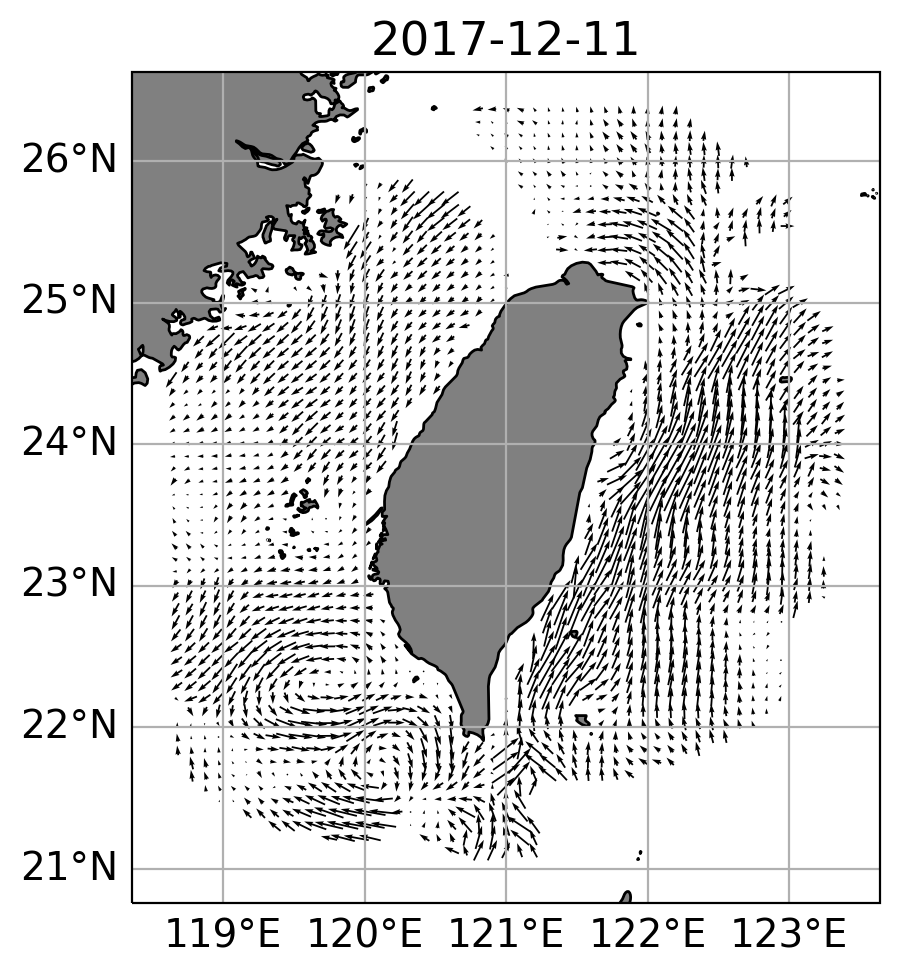

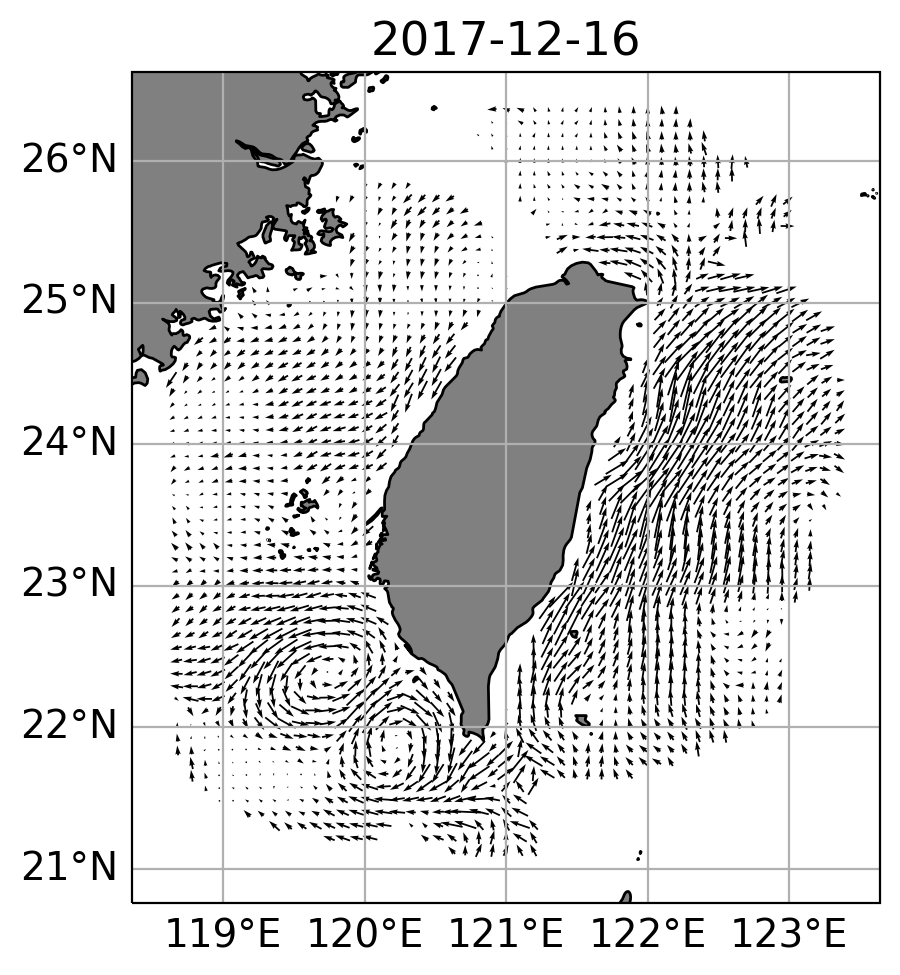

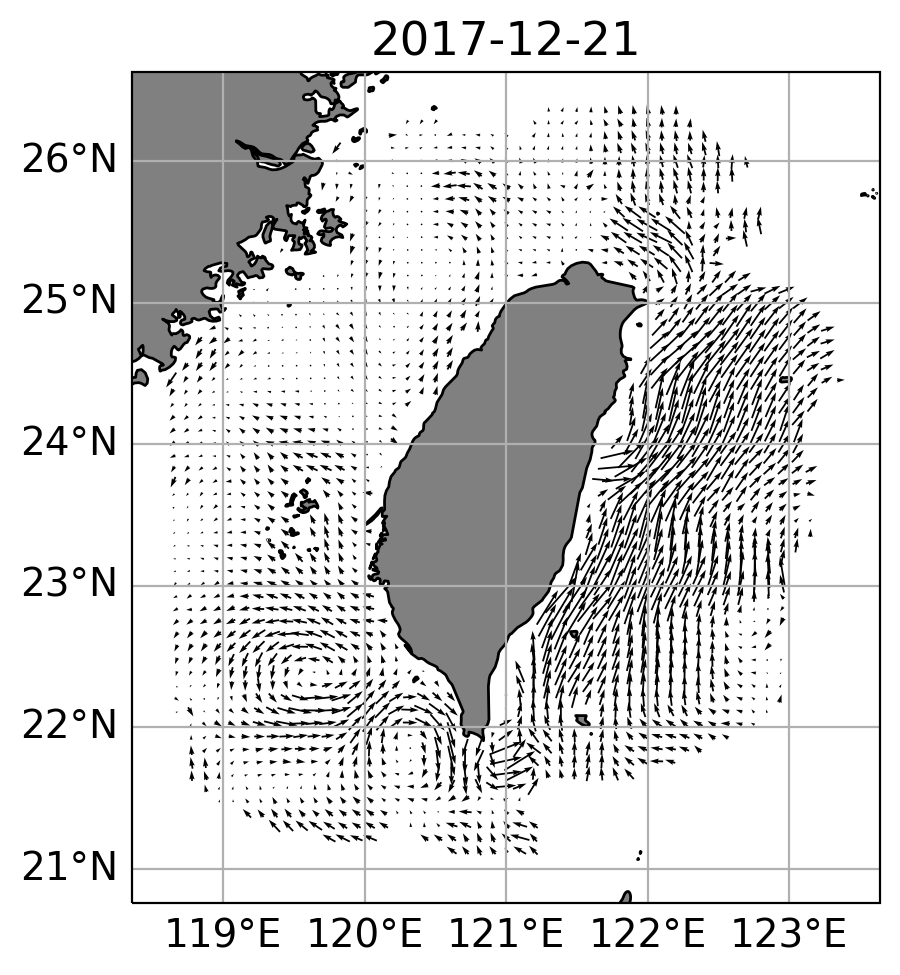

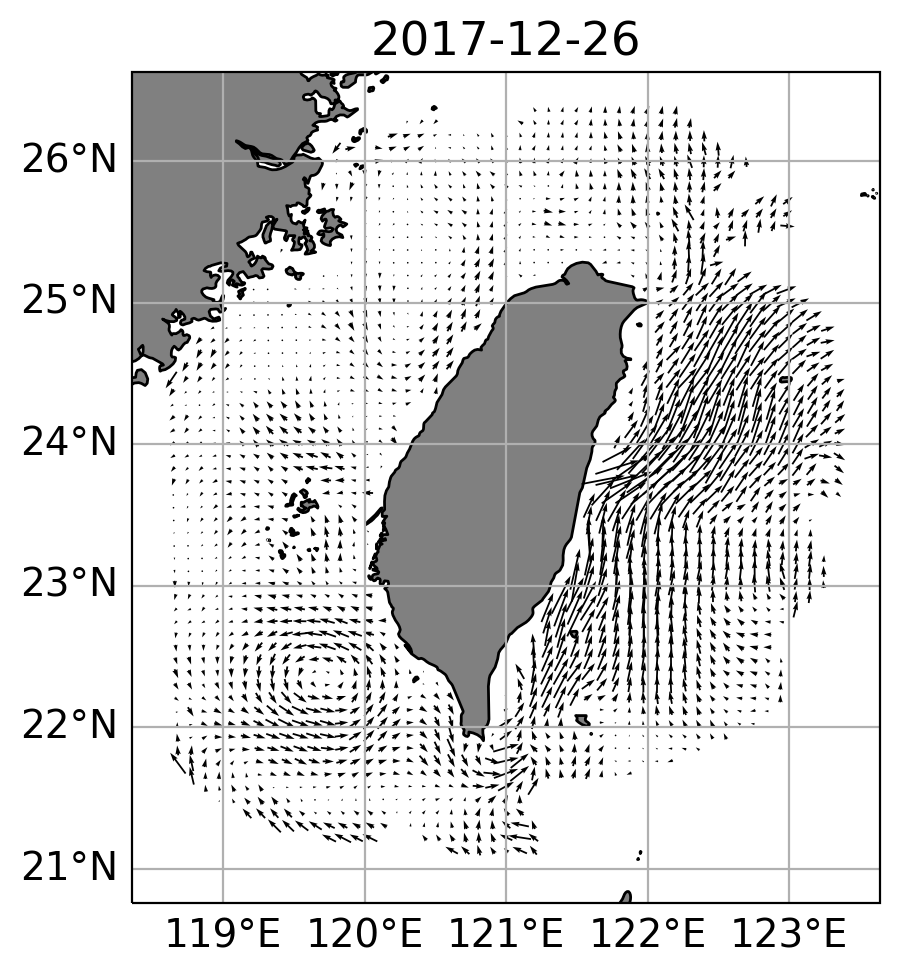

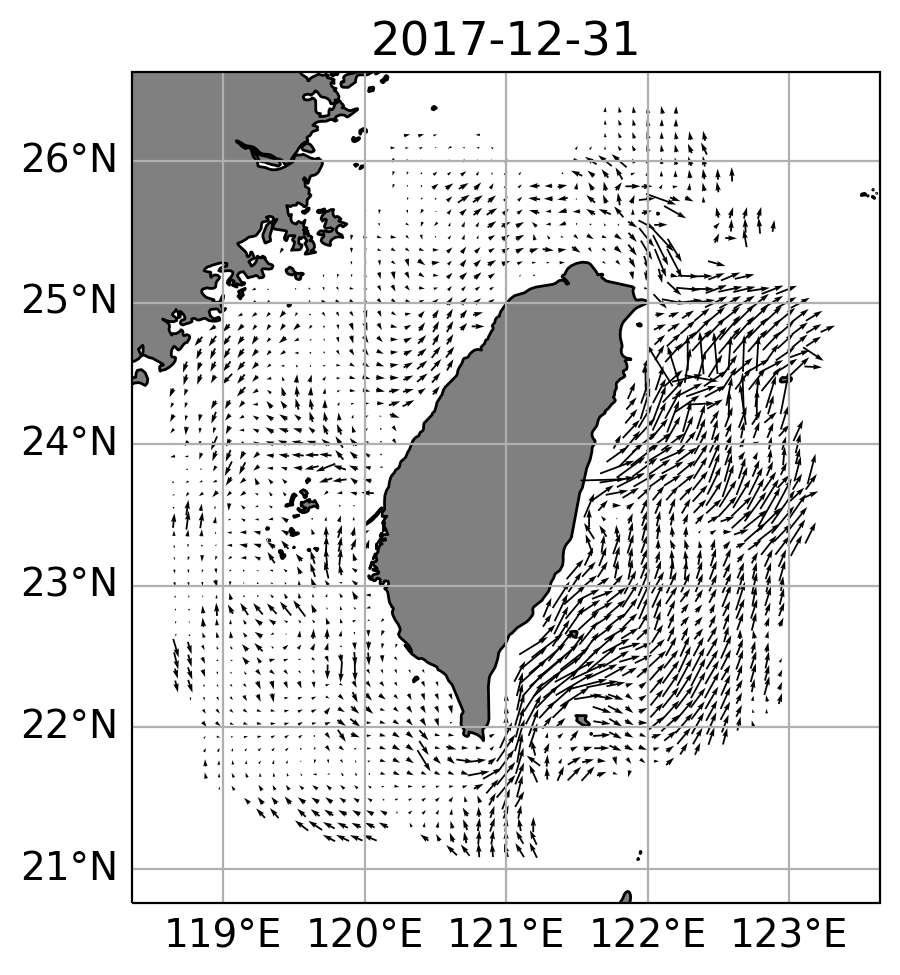

In [8]:
for i in np.arange(361,366):
    mov.preview(i)
    plt.savefig(f'frame_{i:03d}.png',dpi=300)

In [8]:
images = [imageio.imread(f'frame_{i:03d}.png') for i in range(366)]
for j in [365,365,365,365]:
    images.append(imageio.imread(f'frame_{j:03d}.png'))

/tmp/ipykernel_3599/2572542247.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f'frame_{i:03d}.png') for i in range(366)]
/tmp/ipykernel_3599/2572542247.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'frame_{j:03d}.png'))


In [9]:
imageio.mimsave('test.gif', images,fps=6)